In [1]:
import os
import tarfile
import urllib.request
import matplotlib.pyplot as plt

from dlvc.datasets.cifar10 import CIFAR10Dataset
from dlvc.datasets.dataset import Subset

%load_ext autoreload

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

unpickle('cifar-10-batches-py/data_batch_1')

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [3]:
data_directory = 'cifar-10-batches-py'

training_dataset = CIFAR10Dataset(fdir=data_directory, subset=Subset.TRAINING)
validation_dataset = CIFAR10Dataset(fdir=data_directory, subset=Subset.VALIDATION)
test_dataset = CIFAR10Dataset(fdir=data_directory, subset=Subset.TEST)

In [4]:
len(training_dataset.classes)

10

In [5]:
training_dataset.__len__()

40000

In [6]:
validation_dataset.__len__()

10000

In [7]:
test_dataset.__len__()

10000

In [8]:
training_dataset.num_classes()

10

In [9]:
training_dataset[0][0].shape

(32, 32, 3)

Training Samples:


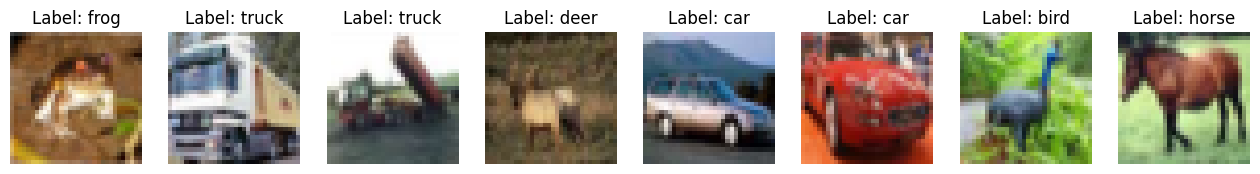

In [10]:
def plot_samples(dataset, num_samples=8):
    fig, axes = plt.subplots(1, num_samples, figsize=(2*num_samples, 2))
    for i, ax in enumerate(axes):
        # Retrieve the i-th sample from the dataset
        image, label = dataset[i]
        
        ax.imshow(image)
        ax.set_title(f'Label: {dataset.classes[label]}')
        ax.axis('off')
    plt.show()
    
def plot_sample(sample):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    image, label = sample
    ax.imshow(image)
    ax.set_title(f'Label: {training_dataset.classes[label]}')
    ax.axis('off')
    plt.show()

# Plot samples from each dataset
print("Training Samples:")
plot_samples(training_dataset)

Validation Samples:


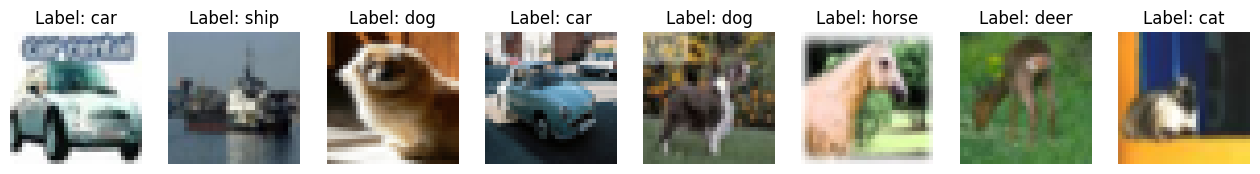

In [11]:
print("Validation Samples:")
plot_samples(validation_dataset)

Test Samples:


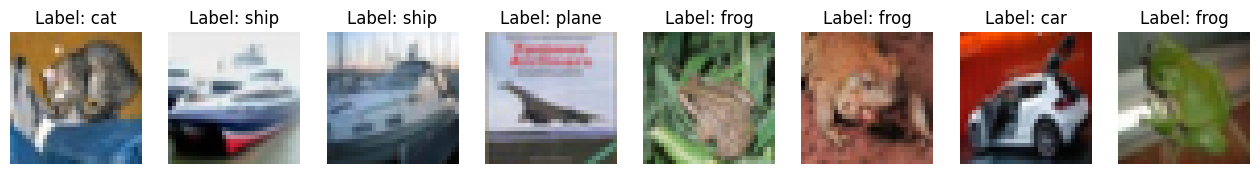

In [12]:
print("Test Samples:")
plot_samples(test_dataset)

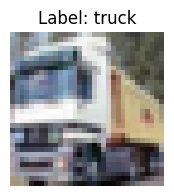

In [13]:
plot_sample(training_dataset.__getitem__(1))

In [14]:
print("Labels of first 10 training samples:", [training_dataset[i][1] for i in range(10)])

Labels of first 10 training samples: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


frog  truck truck deer  car   car   bird  horse


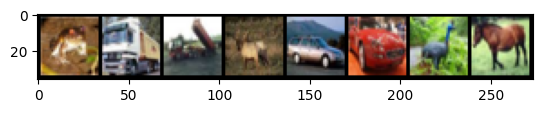

In [17]:
import torch
import torchvision
import torchvision.transforms.v2 as v2

from dlvc.viz import imshow

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

transform = v2.Compose([v2.ToImage(), 
                            v2.ToDtype(torch.float32, scale=True)])


    
train_data = CIFAR10Dataset(fdir='cifar-10-batches-py', subset=Subset.TRAINING, transform=transform)
train_data_loader = torch.utils.data.DataLoader(train_data,
                                        batch_size=8,
                                        shuffle=False,
                                        num_workers=2)

# get some random training images
dataiter = iter(train_data_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [19]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

2.3.0+cu121
True


# Metrics

In [36]:
from dlvc.metrics import Accuracy

accuracy_measure = Accuracy(classes=['cat', 'dog', 'frog'])

# predictions = torch.randn(10, 3)
predictions = torch.tensor([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
    ])
targets = torch.tensor([0, 1, 2])

accuracy_measure.update(predictions, targets)
print(accuracy_measure)

Overall Accuracy: 1.0000, Per class accuracy: 1.0000
